# Predict Height on the basis of Age

## Load Libraries

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

## Load Data

In [5]:
data = pd.read_pickle('AgesAndHeights.pkl')

Note: Height is in inches.

## Understand the data

In [8]:
data.sample(n=5)

,Age,Height
39,5.993726,43.287003
21,1.295979,31.523500
49,15.698765,62.641537
91,-0.328780,27.819052
90,14.274300,56.364458


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     100 non-null    float64
 1   Height  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [10]:
data.shape

(100, 2)

In [11]:
data.describe()

,Age,Height
count,100.000000,100.000000
mean,7.966138,45.955674
std,5.321621,10.787318
min,-0.780853,27.332513
25%,3.048885,36.320107
50%,7.795597,46.178251
75%,11.464331,53.994166
max,17.887852,68.170414


### Remarks
___
####  - Here we notice that the minimum age is -0.7 which can't be right.


## Data Correction

In [13]:
data.loc[data['Age'] < 0]

,Age,Height
13,-0.163532,28.647834
20,-0.683017,29.883928
25,-0.146392,32.830922
30,-0.780853,31.960807
36,-0.087958,27.332513
59,-0.548488,30.801346
91,-0.328780,27.819052


### Store heights for age above 0

In [14]:
data = data.loc[data['Age'] > 0]

## Visualising the data

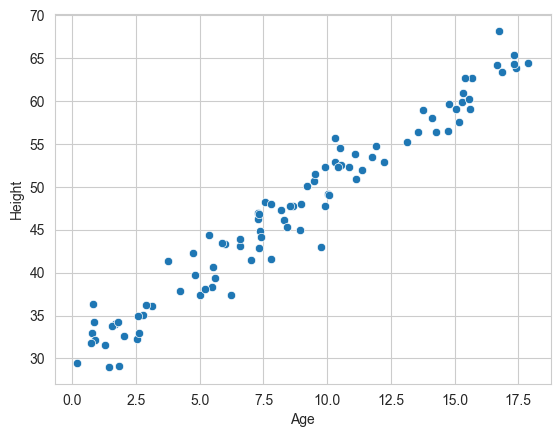

In [20]:
sns.scatterplot(x='Age', y='Height', data=data)
plt.show()

In [21]:
data.corr()

,Age,Height
Age,1.00000,0.97722
Height,0.97722,1.00000


<Axes: >

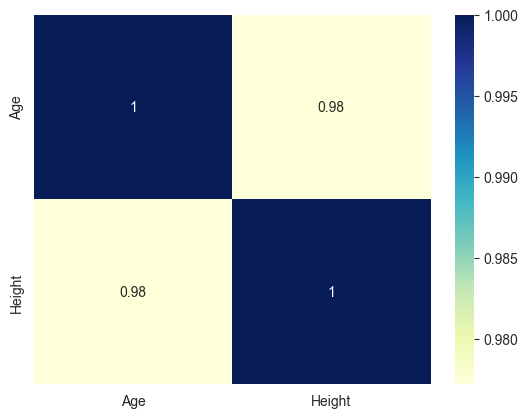

In [22]:
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True)

### Remarks
___
#### We observe a linear distribution, and a good relationship between variables

## Build Linear Regression Model

In [23]:
X = data['Age']

In [24]:
y = data['Height']

### Split Data

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [28]:
# Checking the shape of X values
X_train.shape

(65,)

In [29]:
X_train = X_train.values.reshape(-1,1)

In [30]:
X_test = X_test.values.reshape(-1,1)

In [31]:
lm = LinearRegression()

### Fit the data

In [32]:
lm.fit(X_train, y_train)

LinearRegression()

In [33]:
print(lm.intercept_)
print(lm.coef_)

29.80404245732689
[2.02127877]


In [40]:
print(f'Formula: Height = {lm.intercept_} + {lm.coef_[0]} * Age')

Formula: Height = 29.80404245732689 + 2.0212787747500838 * Age


### Check the r2 score

In [41]:
# Predict for Train dataset
y_train_pred = lm.predict(X_train)

In [43]:
# Predict for Test dataset
y_test_pred = lm.predict(X_test)

In [45]:
# Check the r2 score
print(r2_score(y_train, y_train_pred)) # Score for Training set
print(r2_score(y_test, y_test_pred)) # Score for Test set

0.9568098262997996
0.9494262269115491


### Visualising the Fit

#### Training Dataset

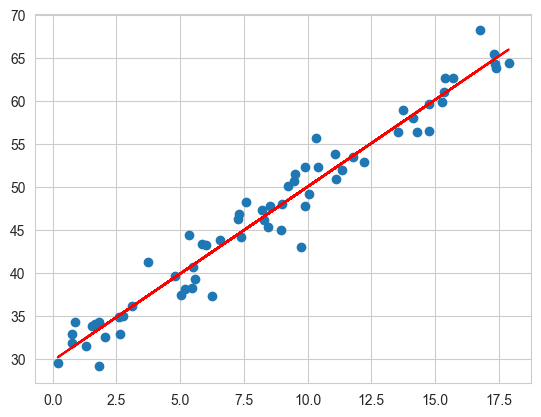

In [46]:
plt.scatter(X_train, y_train)
plt.plot(X_train, lm.intercept_ + lm.coef_ * X_train, 'r')
plt.show()

#### Test Dataset

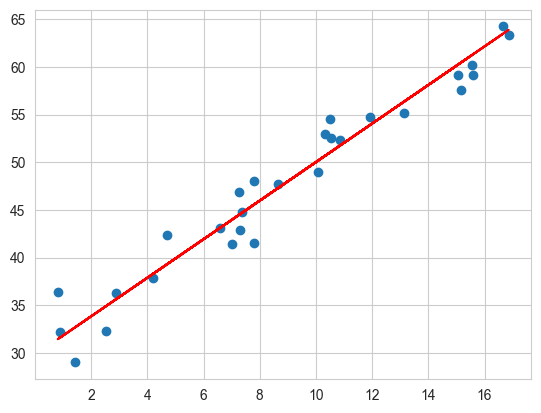

In [47]:
plt.scatter(X_test, y_test)
plt.plot(X_test, lm.intercept_ + lm.coef_ * X_test, 'r')
plt.show()

## Let's predict height based on the age now. Shall we?

In [66]:
input_age = int(input('Enter the age for which you want to predict the height.'))

In [67]:
# Predict age
height = lm.predict([[input_age]])

In [68]:
# Rounding off
height = round(height[0], 2)

In [69]:
print(f'As per the Simple Linear Regression Model, the predicted Height is {height} inches ({round(height * 2.54, 2)} cm).')

As per the Simple Linear Regression Model, the predicted Height is 33.85 inches (85.98 cm).
